In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [26]:
#data
df=pd.read_csv("spotify-2023.csv",encoding='ISO-8859-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [6]:
#structure of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [8]:
#statistics of the data
df.describe()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


<Axes: >

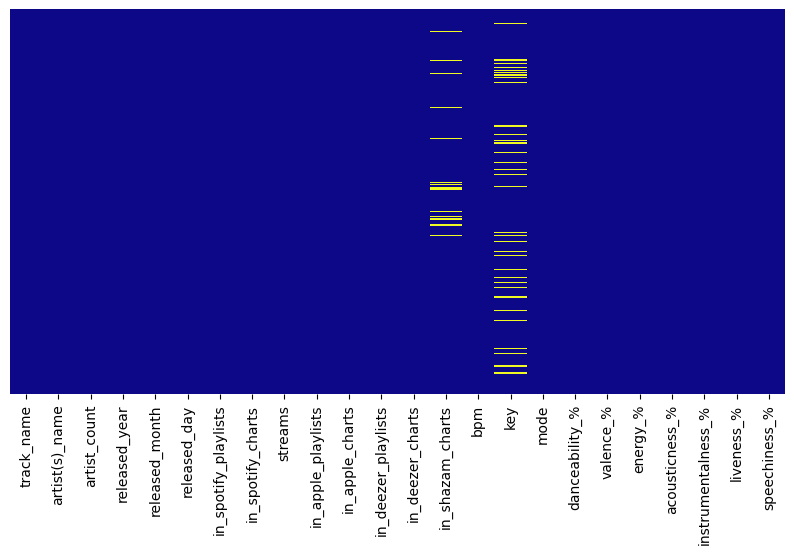

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [24]:
# Calculate Top 10 Artists by Track Count
top_artists = df['artist(s)_name'].value_counts().nlargest(10).reset_index()

# Rename columns for better understanding
top_artists.columns = ['artist(s)_name', 'track_count']

# Display Top 10 Artists by Track Count
print("Top 10 Artists by Track Count:")
print(top_artists)

# Create an interactive bar plot using Plotly Express
fig = px.bar(top_artists,
             x='track_count',
             y='artist(s)_name',
             orientation='h', # Horizontal bars
             title='Top 10 Artists by Track Count',
             labels={'track_count': 'Number of Tracks', 'artist(s)_name': 'Artist Name'},
             text='track_count') # Display track count on the bars

# Show the plot
fig.show()

Top 10 Artists by Track Count:
   artist(s)_name  track_count
0    Taylor Swift           34
1      The Weeknd           22
2       Bad Bunny           19
3             SZA           19
4    Harry Styles           17
5  Kendrick Lamar           12
6   Morgan Wallen           11
7      Ed Sheeran            9
8             BTS            8
9            Feid            8


Most Streamed Tracks:
                                          track_artist       streams
55                        Blinding Lights - The Weeknd  3.703895e+09
179                          Shape of You - Ed Sheeran  3.562544e+09
86                   Someone You Loved - Lewis Capaldi  2.887242e+09
620                         Dance Monkey - Tones and I  2.864792e+09
41   Sunflower - Spider-Man: Into the Spider-Verse ...  2.808097e+09
162                    One Dance - Drake, WizKid, Kyla  2.713922e+09
84   STAY (with Justin Bieber) - Justin Bieber, The...  2.665344e+09
140                         Believer - Imagine Dragons  2.594040e+09
725                  Closer - The Chainsmokers, Halsey  2.591224e+09
48                     Starboy - The Weeknd, Daft Punk  2.565530e+09


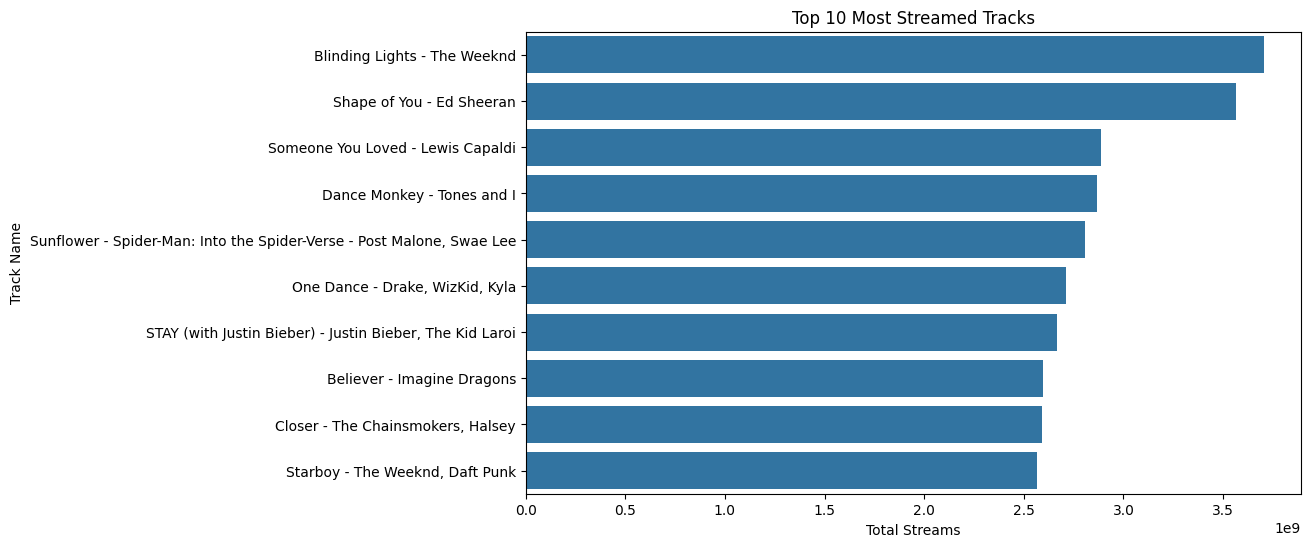

In [32]:
# Most Streamed Tracks
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
#add track artist for more
df['track_artist'] = df['track_name'] + " - " + df['artist(s)_name']
top_tracks = df[['track_artist', 'streams']].sort_values(by='streams', ascending=False).head(10)
print("Most Streamed Tracks:")
print(top_tracks)

# Plot Most Streamed Tracks
plt.figure(figsize=(10,6))
sns.barplot(x='streams', y='track_artist', data=top_tracks)
plt.title('Top 10 Most Streamed Tracks')
plt.xlabel('Total Streams')
plt.ylabel('Track Name')
plt.show()

In [45]:
##Total streams over time time of release
# Ensure columns are numeric
df['released_year'] = pd.to_numeric(df['released_year'], errors='coerce')
df['released_month'] = pd.to_numeric(df['released_month'], errors='coerce')
df['released_day'] = pd.to_numeric(df['released_day'], errors='coerce')
df['released_year'] = df['released_year'].astype(str)
df['released_month'] = df['released_month'].astype(str)
df['released_day'] = df['released_day'].astype(str)
# Create the release_date column from the year, month, and day columns
df['release_date'] = df['released_year'] + " - " + df['released_month']+ " - " + df['released_day']
df['release_date'] = pd.to_datetime(df['release_date'])
# Create a Year-Month column for aggregation
df['year_month'] = df['release_date'].dt.to_period('M')

# Group streams by Year-Month
streams_by_month = df.groupby('year_month')['streams'].sum().reset_index()

# Convert the 'year_month' column to string for better plotting in Plotly
streams_by_month['year_month'] = streams_by_month['year_month'].astype(str)

# Plot Streams by Year/Month using Plotly Express
fig = px.line(streams_by_month,
              x='year_month',
              y='streams',
              title='Total Streams Over Time (By Year/Month)',
              labels={'streams': 'Total Streams', 'year_month': 'Year-Month'})

# Show interactive plot
fig.show()


track_name                             object
artist(s)_name                         object
artist_count                            int64
released_year                          object
released_month                         object
released_day                           object
in_spotify_playlists                    int64
in_spotify_charts                       int64
streams                               float64
in_apple_playlists                      int64
in_apple_charts                         int64
in_deezer_playlists                     int64
in_deezer_charts                        int64
in_shazam_charts                       object
bpm                                     int64
key                                    object
mode                                   object
danceability_%                          int64
valence_%                               int64
energy_%                                int64
acousticness_%                          int64
instrumentalness_%                

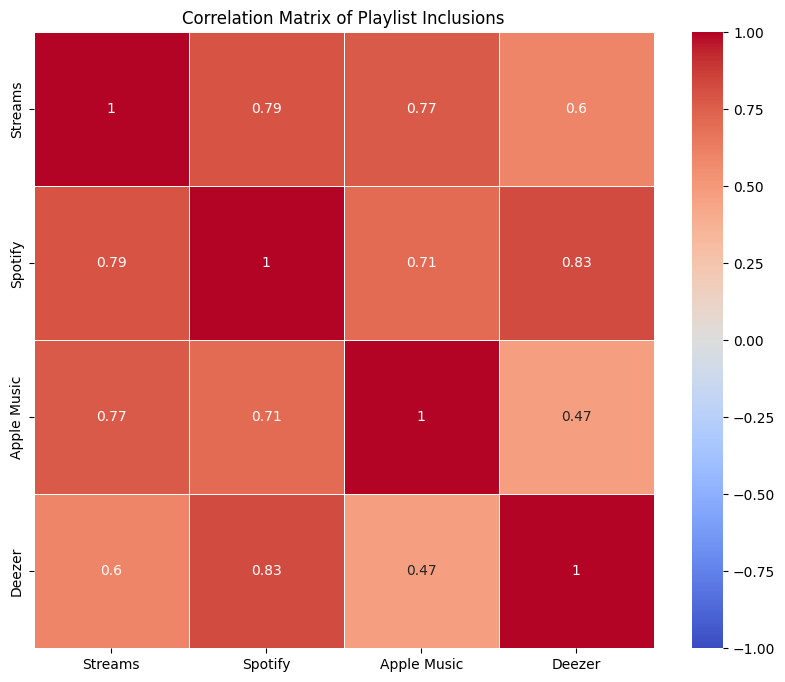

In [63]:
##Correlation of playlist accross all platforms

# Define a function to clean and convert columns to numeric
def clean_and_convert_to_numeric(df, columns):
    for col in columns:
        # Convert column to string first, then remove commas, and finally convert to numeric
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '', regex=False), errors='coerce')

# Specify the columns that need to be converted
columns_to_convert = ['streams', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']

# Apply the function
clean_and_convert_to_numeric(df, columns_to_convert)

# Verify the data types
print(df.dtypes)

# Calculate correlation matrix
correlation_matrix = df[columns_to_convert].corr()
# Rename columns and index for better readability
correlation_matrix.columns = ['Streams','Spotify', 'Apple Music', 'Deezer']
correlation_matrix.index = ['Streams','Spotify', 'Apple Music', 'Deezer']
print(correlation_matrix)
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5)
plt.title('Correlation Matrix of Playlist Inclusions')
plt.show()


In [67]:
#audio features
features = ['bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
# Melt the DataFrame to have features in one column
df_melted = df.melt(value_vars=features, var_name='Feature', value_name='Value')

# Create a boxplot
fig = px.box(df_melted, x='Feature', y='Value',color='Feature', title='Audio Features of songs across 2023')
fig.show()


In [69]:
# Calculate the total playlist inclusion for each artist
df['total_playlist_inclusion'] = df[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum(axis=1)

# Group by artist and sum playlist inclusion
artist_playlist_inclusion = df.groupby('artist(s)_name')['total_playlist_inclusion'].sum()

# Get the top 10 artists with the highest playlist inclusion
top_10_artists = artist_playlist_inclusion.nlargest(10).reset_index()

# Plot using Plotly Express
fig = px.bar(top_10_artists, x='total_playlist_inclusion', y='artist(s)_name',
             title='Top 10 Artists with Highest Playlist Inclusion',
             labels={'total_playlist_inclusion': 'Total Playlist Inclusion', 'artist(s)_name': 'Artist'},
             color='total_playlist_inclusion',
             color_continuous_scale='Blues')

fig.update_layout(yaxis_title='Artist', xaxis_title='Total Playlist Inclusion')
fig.show()

In [79]:
#Audio Features of Top charting songs
# Filter tracks that are in the top 100 charts on any platform
top_100_tracks = df[(df['in_spotify_charts'] <= 100) |
                    (df['in_apple_charts'] <= 100) |
                    (df['in_deezer_charts'] <= 100)]

# Features to analyze
features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
            'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Calculate average values of features for top 100 tracks
average_features = top_100_tracks[features].mean().reset_index()
average_features.columns = ['Feature', 'Average Value']

# Plot using Plotly Express
fig = px.bar(average_features, x='Feature', y='Average Value',
             title='Average Features of Chart-Topping Tracks',
             labels={'Average Value': 'Average Value'},
             color='Average Value',
             color_continuous_scale='Viridis')

fig.update_layout(xaxis_title='Feature', yaxis_title='Average Value')
fig.show()
###
# Valence vs. Streams
fig_valence = px.bar(df, x='valence_%', y='streams',
                         title='Valence vs. Streams',
                         labels={'valence_%': 'Valence (%)', 'streams': 'Streams'},
                         color='valence_%',
                         color_continuous_scale='Viridis')
fig_valence.update_layout(xaxis_title='Valence (%)', yaxis_title='Streams')
fig_valence.show()

# Energy vs. Streams
fig_energy = px.bar(df, x='energy_%', y='streams',
                       title='Energy vs. Streams',
                       labels={'energy_%': 'Energy (%)', 'streams': 'Streams'},
                       color='energy_%',
                       color_continuous_scale='Plasma')
fig_energy.update_layout(xaxis_title='Energy (%)', yaxis_title='Streams')
fig_energy.show()

In [80]:
# Top Collaborations by Streams
top_collaborations = df.groupby('artist_count').agg({
    'streams': 'sum'
}).reset_index().sort_values(by='streams', ascending=False)

# Plot top collaborations
fig_top_collaborations = px.bar(top_collaborations, x='artist_count', y='streams',
                                title='Top Collaborations by Streams',
                                labels={'artist_count': 'Artist Count', 'streams': 'Total Streams'},
                                color='streams',
                                color_continuous_scale='Viridis')
fig_top_collaborations.update_layout(xaxis_title='Artist Count', yaxis_title='Total Streams')
fig_top_collaborations.show()

In [84]:
# Filter for top chart positions (assuming top 100 as a general criteria)
top_chart_df = df[(df['in_spotify_charts'] <= 100) |
                  (df['in_apple_charts'] <= 100) |
                  (df['in_deezer_charts'] <= 100)]

# Count the number of top chart songs per artist
top_chart_counts = top_chart_df['artist(s)_name'].value_counts().reset_index()
top_chart_counts.columns = ['Artist', 'Number of Top Chart Songs']

# Get the top 10 artists with the most top chart songs
top_10_artists = top_chart_counts.head(10)

print("Top 10 Artists with the Most Songs in Top Charts:")
print(top_10_artists)
# Plot using Plotly Express
fig = px.bar(top_10_artists, x='Artist', y='Number of Top Chart Songs',
             title='Top 10 Artists with the Most Songs in Top Charts',
             labels={'Artist': 'Artist', 'Number of Top Chart Songs': 'Number of Top Chart Songs'},
             color='Number of Top Chart Songs',
             color_continuous_scale='inferno')

fig.update_layout(xaxis_title='Artist', yaxis_title='Number of Top Chart Songs')
fig.show()

Top 10 Artists with the Most Songs in Top Charts:
           Artist  Number of Top Chart Songs
0    Taylor Swift                         34
1      The Weeknd                         22
2       Bad Bunny                         19
3             SZA                         19
4    Harry Styles                         17
5  Kendrick Lamar                         12
6   Morgan Wallen                         11
7      Ed Sheeran                          9
8             BTS                          8
9            Feid                          8


Machine Learning Technqiues

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

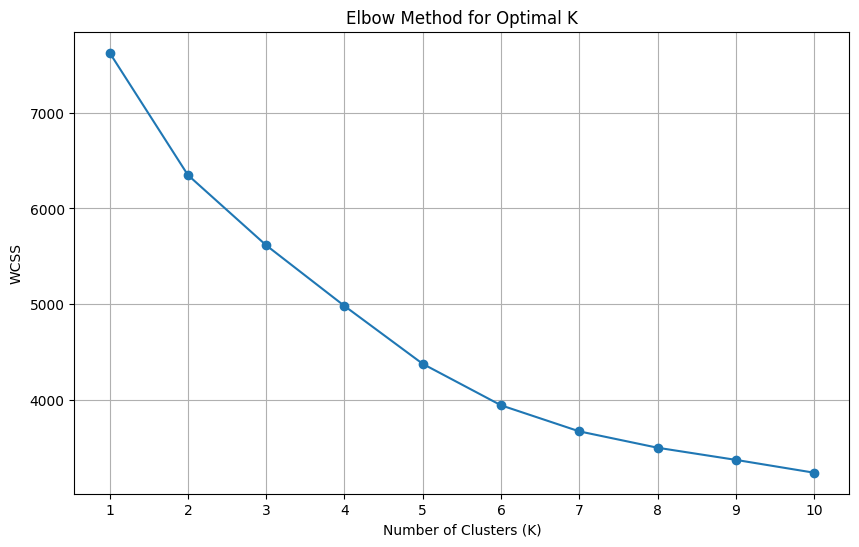

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

Best Silhouette Score: 0.2256
Optimal Number of Clusters (K): 2


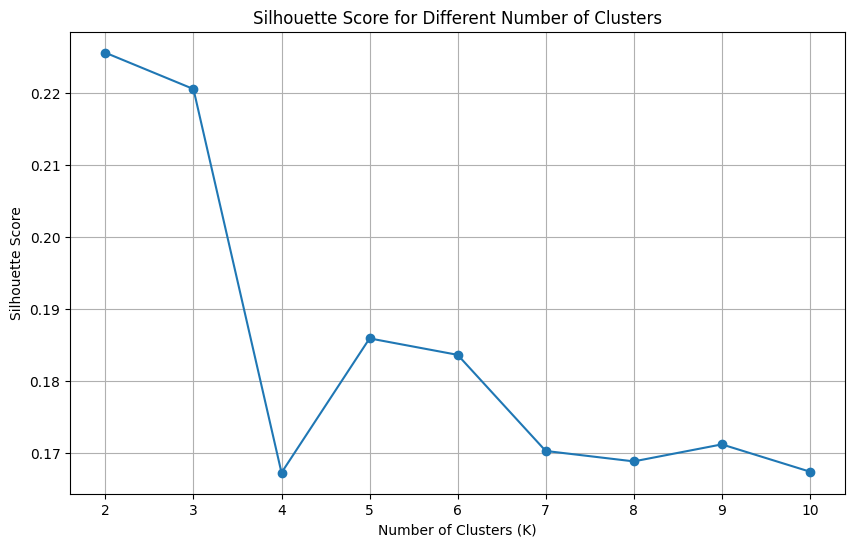

In [98]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
# Select relevant features and drop rows with missing values
features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
X = df[features].dropna()
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the range of K values to test
K_range = range(1, 11)  # Testing from 1 to 10 clusters
wcss = []

# Run K-Means for each K and calculate WCSS
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(K_range)
plt.grid(True)
plt.show()
K_range = range(2, 11)  # Starting from 2 because silhouette score is not defined for 1 cluster
silhouette_scores = []

# Compute silhouette scores for each K
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Find the best silhouette score and corresponding number of clusters
best_silhouette_score = max(silhouette_scores)
best_k = K_range[silhouette_scores.index(best_silhouette_score)]

# Print the best silhouette score
print(f"Best Silhouette Score: {best_silhouette_score:.4f}")
print(f"Optimal Number of Clusters (K): {best_k}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [108]:
#Create Another Variable as there can be more than 2 clusters
 #Apply log transformation to the 'streams' feature
df['log_streams'] = np.log1p(df['streams'])

# Create a new feature called 'mood' that combines danceability, energy, and valence
df['mood'] = (df['danceability_%'] + df['energy_%'] + df['valence_%']) / 3
df['released_year'] = pd.to_numeric(df['released_year'], errors='coerce')
# Assuming you have a 'released_year' column
current_year = 2024  # Change this to the current year
df['track_age'] = current_year - df['released_year']

In [110]:
# Drop rows with missing values
df_cleaned = df.dropna(subset=['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%','danceability_%', 'energy_%', 'valence_%', 'acousticness_%',
                               'instrumentalness_%', 'log_streams', 'mood', 'track_age'])

# Selecting features for clustering (including the new features)
features_for_clustering = df_cleaned[['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%','danceability_%', 'energy_%', 'valence_%', 'acousticness_%',
                               'instrumentalness_%', 'log_streams', 'mood', 'track_age','danceability_%', 'energy_%', 'valence_%', 'acousticness_%',
                                      'instrumentalness_%', 'log_streams', 'mood', 'track_age']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Initialize variables to track the best score and number of clusters for the updated model
best_score = -1
best_k = None
updated_scores = []

# Iterate over a range of cluster values (e.g., 2 to 10)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(scaled_features)  # Using the updated scaled features

    # Calculate the silhouette score for the current number of clusters
    score = silhouette_score(scaled_features, clusters)
    updated_scores.append(score)

    # Update the best score and number of clusters if the current score is better
    if score > best_score:
        best_score = score
        best_k = k

# Display the best score and corresponding number of clusters
print(f'Best Silhouette Score: {best_score:.3f} with {best_k} clusters')


Best Silhouette Score: 0.247 with 3 clusters


In [111]:
# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_features)

# Add the new cluster labels to the dataframe
df_cleaned['Cluster'] = clusters

# Calculate the mean values of the audio features and engineered features for each cluster in the updated model
cluster_summary_updated = df_cleaned.groupby('Cluster')[
    ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%',
     'instrumentalness_%', 'log_streams', 'mood', 'track_age']].mean()

# Display the summary statistics for each cluster
cluster_summary_updated

<ipython-input-111-9cde9102ed12>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,danceability_%,energy_%,valence_%,acousticness_%,instrumentalness_%,log_streams,mood,track_age
Cluster,,,,,,,,
0,60.352941,58.647059,32.235294,31.000000,57.411765,19.333769,50.411765,8.176471
1,76.556355,71.764988,70.865707,21.769784,0.215827,19.508622,73.062350,4.848921
2,62.409742,66.080229,36.091691,13.289398,0.641834,19.458463,54.860554,4.550143
3,53.479290,42.627219,36.946746,68.260355,1.284024,19.618677,44.351085,9.988166


In [112]:
# Define cluster names based on characteristics
cluster_names = {
    0: 'Instrumental/Neutral Tracks',
    1: 'Upbeat Dance Tracks',
    2: 'Happy/Neutral',
    3: 'Acoustic Tracks/Melanchonic'
}

# Map the cluster names to the 'Cluster' column
df_cleaned['Cluster_Name'] = df_cleaned['Cluster'].map(cluster_names)

# Display the dataframe with the new cluster names
df_cleaned[['Cluster', 'Cluster_Name']].head()

<ipython-input-112-4a15e7575f50>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Cluster,Cluster_Name
0,1,Upbeat Dance Tracks
1,1,Upbeat Dance Tracks
2,2,Happy/Neutral
3,2,Happy/Neutral
4,0,Instrumental/Neutral Tracks


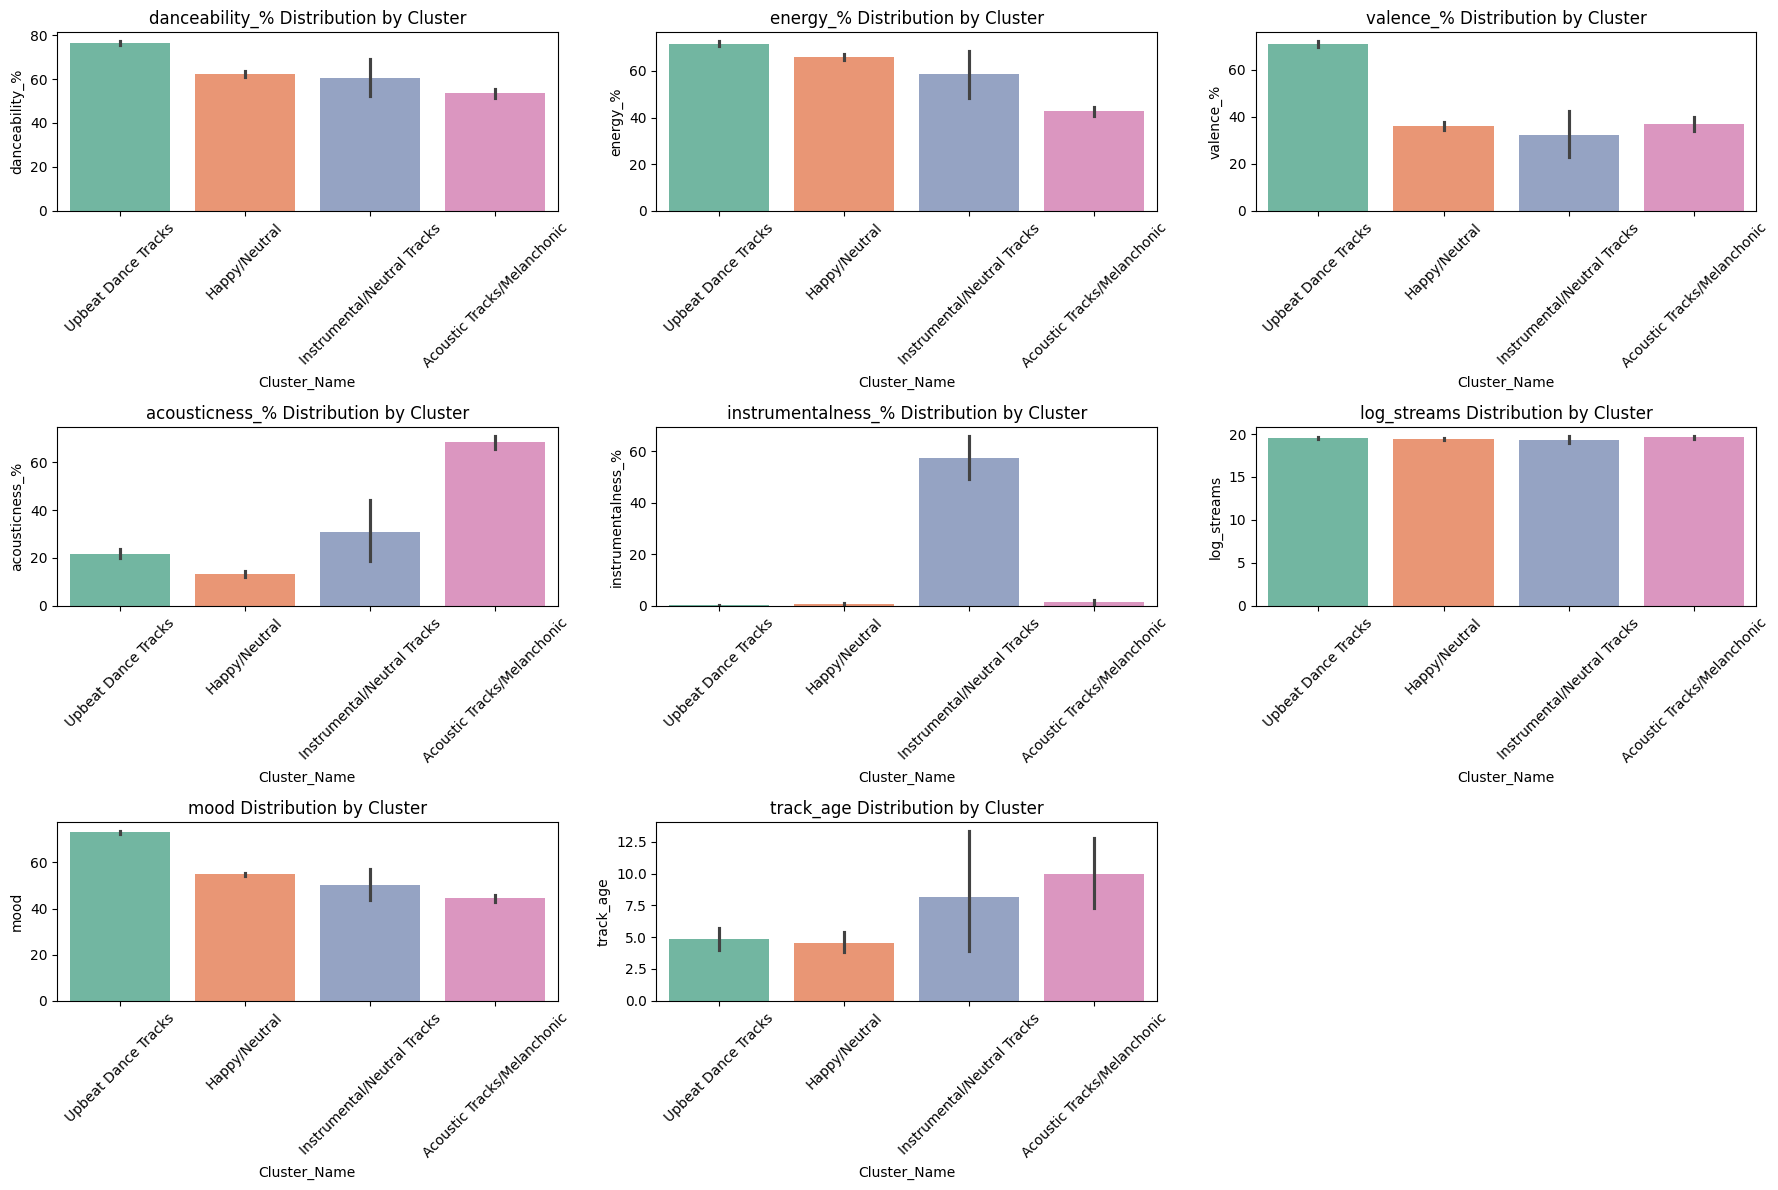

In [117]:
# Set the plot size for the updated model
plt.figure(figsize=(18, 12))

# Update features list to include the engineered features as well
features = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'log_streams', 'mood', 'track_age']

# Create a box plot for each audio feature grouped by the newly named clusters
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x='Cluster_Name', y=feature, data=df_cleaned,hue='Cluster_Name',palette='Set2')
    plt.title(f'{feature} Distribution by Cluster')
    plt.xticks(rotation=45)  # Rotate cluster names for better readability

plt.tight_layout()
plt.show()


<ipython-input-119-6daca760e941>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




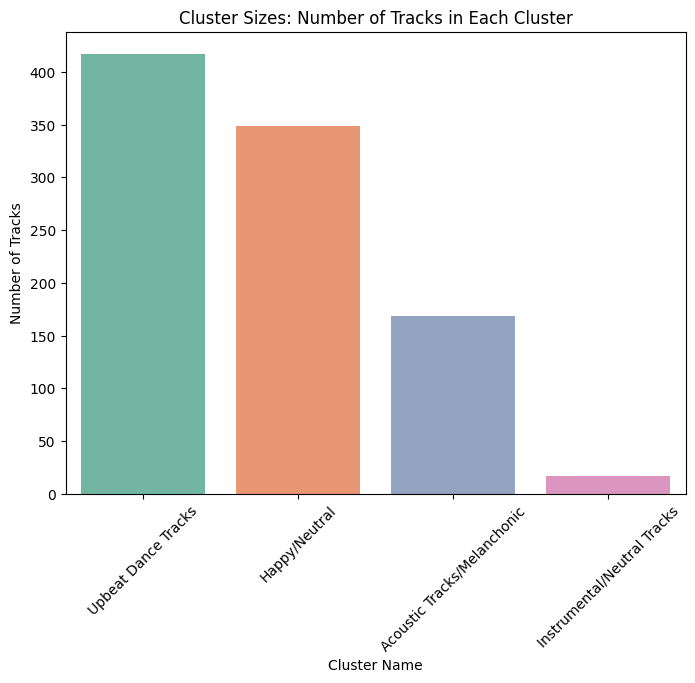

In [119]:
# Count the number of tracks in each newly named cluster
cluster_size_updated = df_cleaned['Cluster_Name'].value_counts()

# Plot the size of each updated cluster
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_size_updated.index, y=cluster_size_updated.values, palette='Set2')
plt.title('Cluster Sizes: Number of Tracks in Each Cluster')
plt.xlabel('Cluster Name')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()

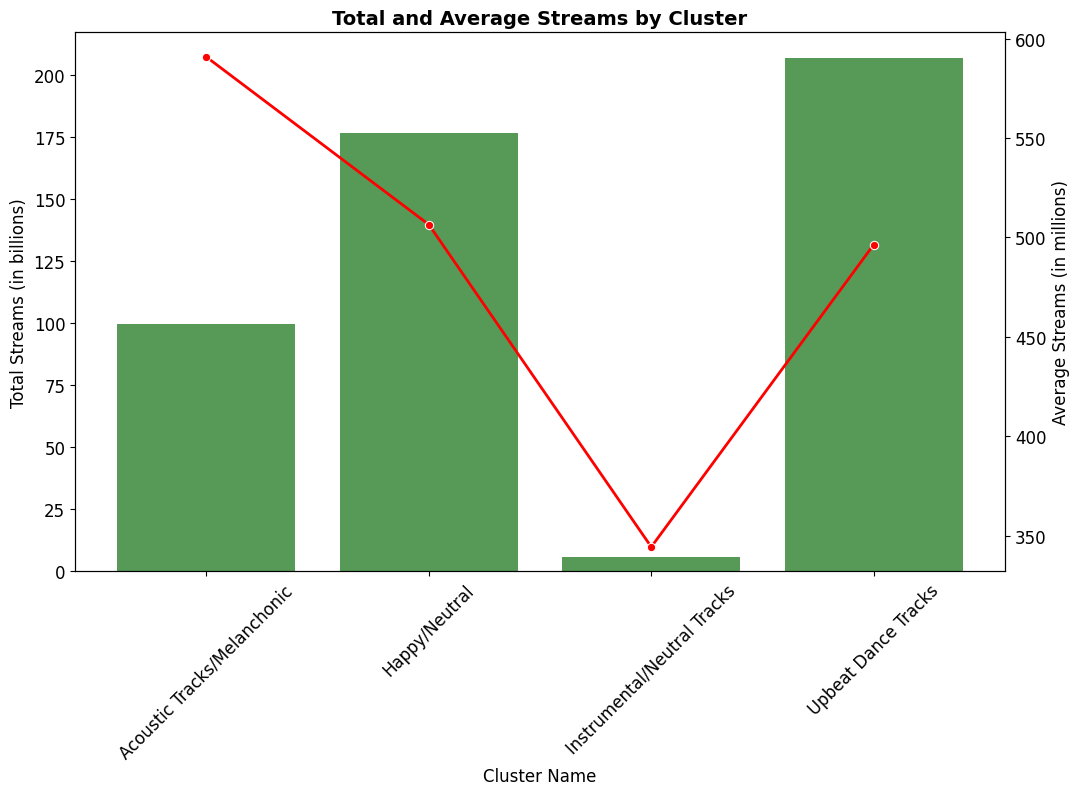

In [121]:
# Recreate the stream analysis with the cleaned data
stream_analysis_updated = df_cleaned.groupby('Cluster_Name')['streams'].agg(['sum', 'mean', 'count'])

# Ensure there are no inf or NaN values in the stream analysis
stream_analysis_updated.replace([np.inf, -np.inf], np.nan, inplace=True)
stream_analysis_updated.fillna(0, inplace=True)  # Replace NaNs with 0 to avoid issues in plotting

# Plot the updated total and average streams for each cluster with improved visual styling
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot total streams (convert to billions)
sns.barplot(x=stream_analysis_updated.index, y=stream_analysis_updated['sum'] / 1e9, ax=ax1, color='green', alpha=0.7)
ax1.set_ylabel('Total Streams (in billions)', fontsize=12)
ax1.set_title('Total and Average Streams by Cluster', fontsize=14, fontweight='bold')
# Improve axis styling
ax1.tick_params(axis='y', labelsize=12)
ax1.set_xlabel('Cluster Name', fontsize=12)
plt.xticks(rotation=45, fontsize=12)

# Create a second y-axis for average streams (convert to millions)
ax2 = ax1.twinx()
sns.lineplot(x=stream_analysis_updated.index, y=stream_analysis_updated['mean'] / 1e6, ax=ax2, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Average Streams (in millions)', fontsize=12)

# Customize y-axis ticks
ax2.tick_params(axis='y', labelsize=12)

# Show the improved plot
plt.show()